In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [3]:
n = 10 #nb des noeuds
k = 15  #nb des itérations
c = 1/(n+1)

a = 30 #longueur de l'espace
b = 20 #largeur de l'espace

r_det = ( ((a**2+b**2)**(1/2))/5 )*6 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

43.26661530556787
14.422205101855956


In [4]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    
    

def mouvement1(x,y,A):      
    for i in range(n):
        a=0
        b=0
        for j in range(n):
            a += (x[j])*A[i][j]
            b += (y[j])*A[i][j]
        x[i]=a
        y[i]=b
    return x,y


def mouvement(x,y,A):      
    
    X = np.copy(np.array(x))
    Y = np.copy(np.array(y))
    
     
    X = np.dot(A,X)
    Y = np.dot(A,Y)
    
    x = X
    y = Y
    return x,y

In [5]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]


matrice d'adjacence :
 [[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


 matrice de communication :
 [[0.         0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.         0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.         0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.         0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.         0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.
  0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.1111111

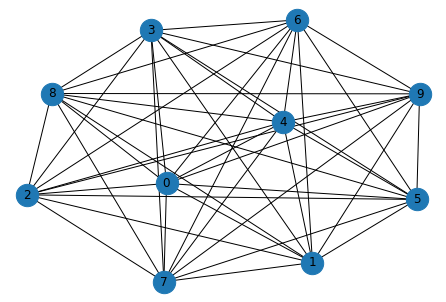

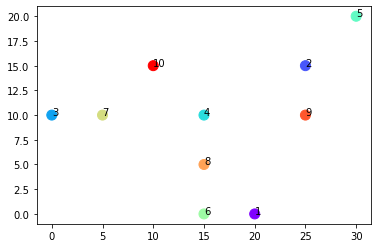

In [6]:
M = positionToAdjMatrix(x,y,r_det)

#affichage
a = np.array(M)
print("matrice d'adjacence :\n",a.reshape(n,n))


#matrice de communication
C = adjToCom(M)
print("\n\n matrice de communication :\n", C.reshape(n,n))

print(C.sum(axis=0))

show_graph_with_labels(a)

colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


 matrice adjacence 
 [[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


 laplacienne 
 [[ 9. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  9. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  9. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  9. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  9. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  9. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  9. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  9. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  9. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  9.]]


 matrice de priorité 
 [[0.16865422 0.13772628 0.07953094 0.13451571 0.02038331 0.11028342
  0.02470538 0.1628034  0.08993488 0.07146247]
 [0.04762994 0.13939113 0.08212419 0.10233945 0.00338287 0.11119758
  0.11020021 0.11107128 0.16991009 0.12275325]
 [0.0919399  0.11176576 0.17841094 0.0154019

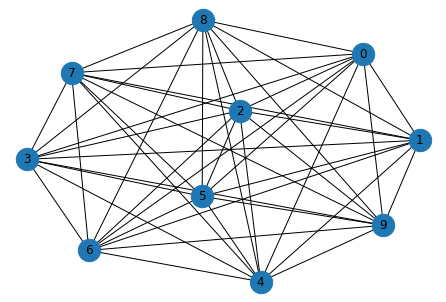

Text(0, 0.5, 'Y axis')

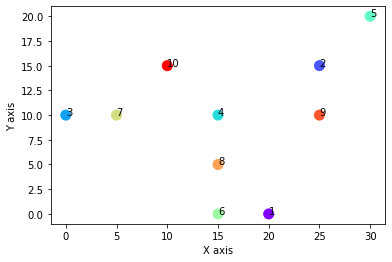

In [7]:

M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)
print("\n matrice adjacence \n", H)

L = Laplacienne(M)
print("\n\n laplacienne \n", L)

P = pMatrix(H)
#print("\n\n P \n",P)

#print("\n\n Ppuissance100 \n",np.linalg.matrix_power(P,100))


W = randStocastic(n)
print("\n\n matrice de priorité \n",W)

S=W
O=W

S = S.sum(axis=0)/n
print("\n\n convergence de W cad Wbar \n",S)


#matrice de communication
A = matriceCom(H,W)
A1 = A
print("\n\n A1 matrice de communication :\n", A1)
print("\n\n A1puissance100 \n",np.linalg.matrix_power(A1,100))

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


plt.xlabel("X axis")

plt.ylabel("Y axis")

In [8]:
valPropre = np.linalg.eigvals(L)
print(np.sort(valPropre, axis=0))

[ 0.+0.00000000e+00j 10.+0.00000000e+00j 10.+0.00000000e+00j
 10.+0.00000000e+00j 10.-1.43217089e-15j 10.-9.33095071e-16j
 10.+0.00000000e+00j 10.+0.00000000e+00j 10.+9.33095071e-16j
 10.+1.43217089e-15j]


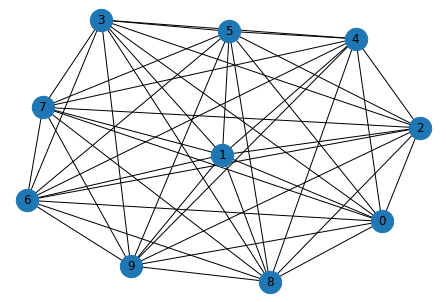

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


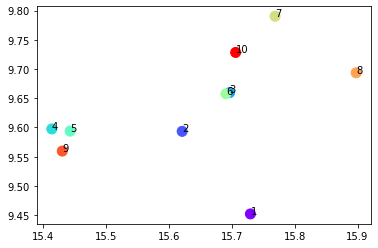

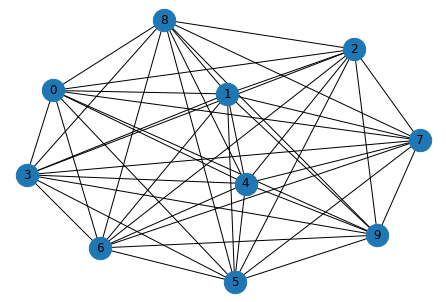

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


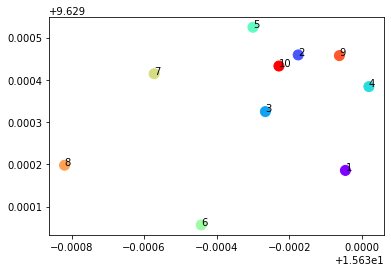

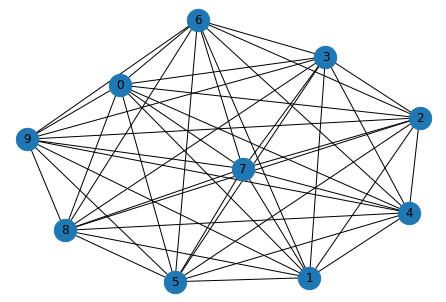

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


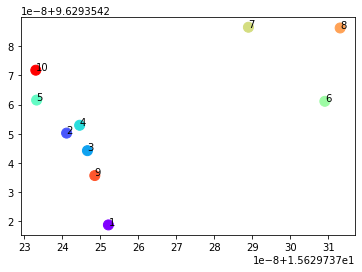

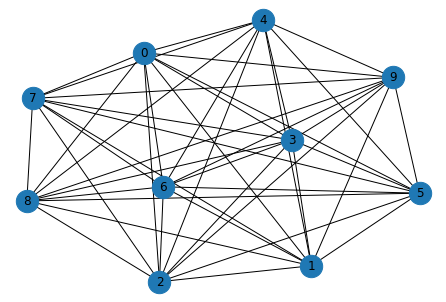

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


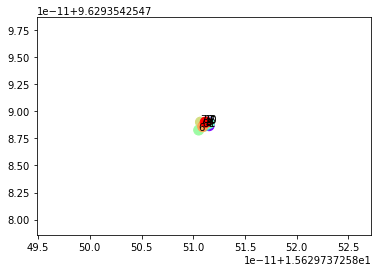

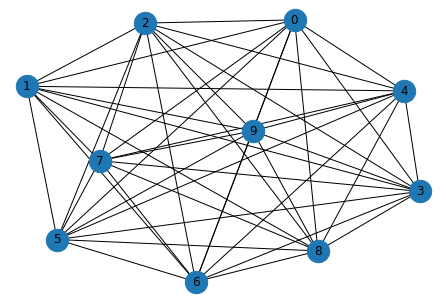

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


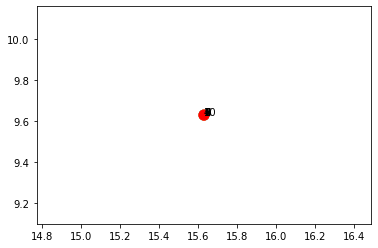

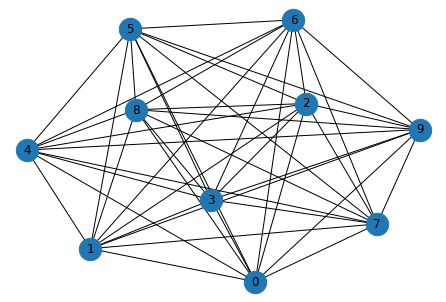

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


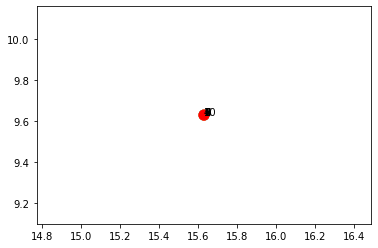

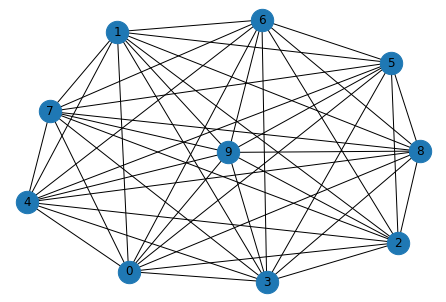

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


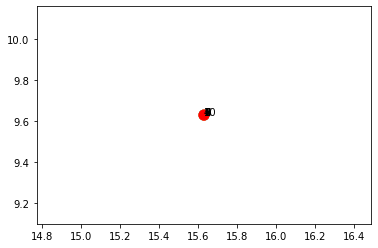

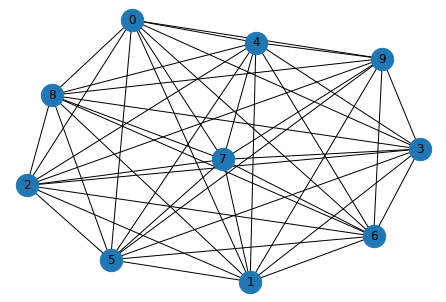

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


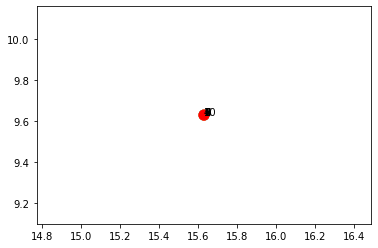

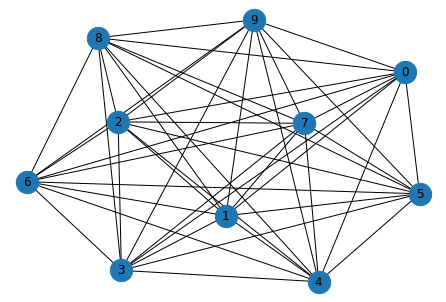

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


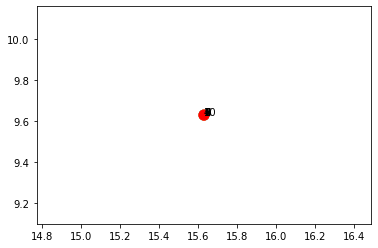

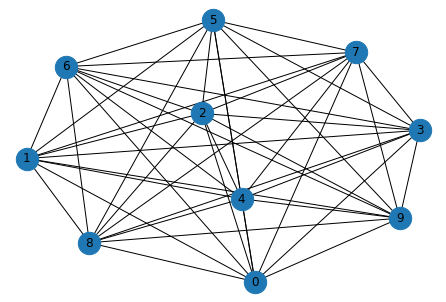

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


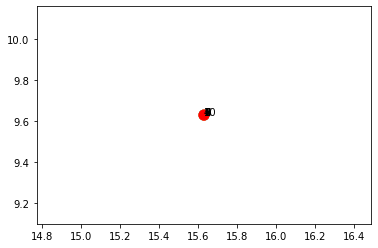

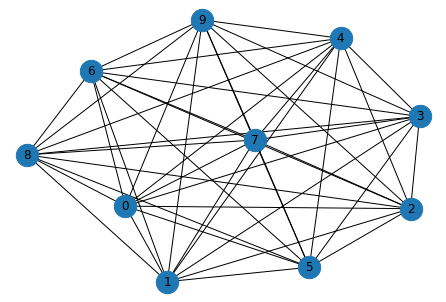

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


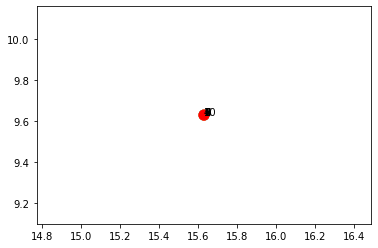

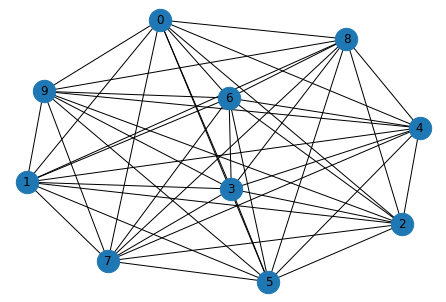

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


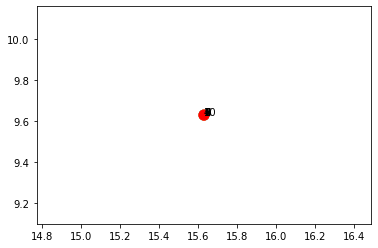

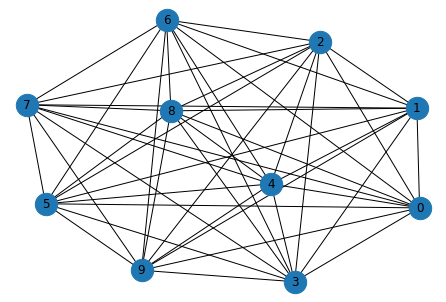

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


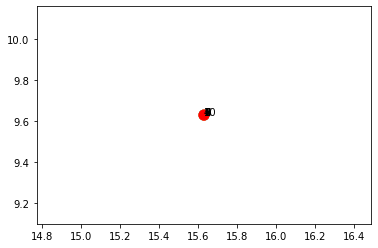

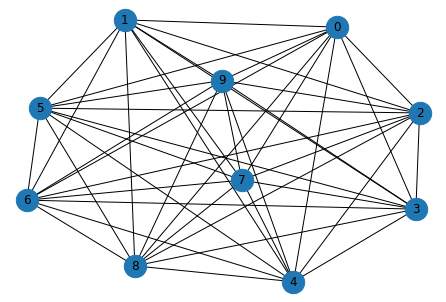

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


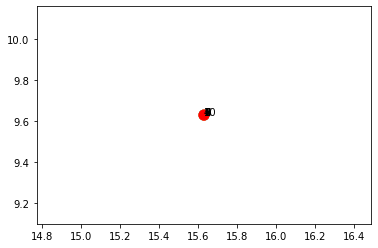

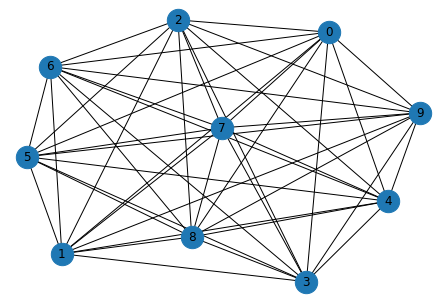

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


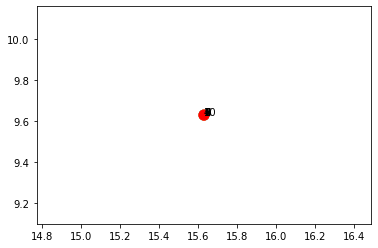

15


 matrice de priorité 
 [[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.0833

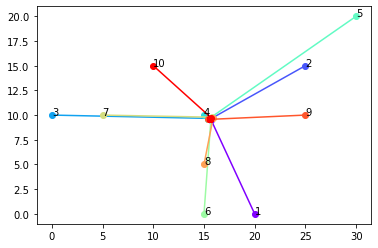

In [9]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)

camera = Camera(plt.figure())

#main
X = []
Y = []

#AF AF : Afinal & PiA : produit An An-1 .... A1 
AF = [[0 for i in range(n)] for j in range(n)]
PiA = []

X.extend(x)
Y.extend(y)
for t in range(k):
    
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    C = adjToCom(M)
    
    x,y = mouvement(x,y,A)
    
    PiA.append(A)
    X.extend(x)
    Y.extend(y)
    a = np.array(X).reshape(t+2,n)
    b = np.array(Y).reshape(t+2,n)
    
    show_graph_with_labels(np.array(M))
    print(H)
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    
    
    AF = A
    
    
    plt.pause(1.1)
    camera.snap()
print(len(PiA))

                 
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)



anim = camera.animate(blit=True)


In [10]:
for i in range(len(PiA)):
    print(i,"\n \n matrice A \n \n",PiA[i][1])



0 
 
 matrice A 
 
 [0.09944578 0.11054342 0.12245495 0.10074688 0.07610992 0.08422594
 0.11515435 0.06797315 0.13212811 0.0912175 ]
1 
 
 matrice A 
 
 [0.10415632 0.1079209  0.12612138 0.1006021  0.08272147 0.08177397
 0.11560472 0.06405514 0.12869338 0.08835062]
2 
 
 matrice A 
 
 [0.10458455 0.10768249 0.12645469 0.10058893 0.08332252 0.08155106
 0.11564567 0.06369896 0.12838114 0.08808999]
3 
 
 matrice A 
 
 [0.10462348 0.10766082 0.12648499 0.10058774 0.08337717 0.0815308
 0.11564939 0.06366658 0.12835275 0.0880663 ]
4 
 
 matrice A 
 
 [0.10462701 0.10765884 0.12648775 0.10058763 0.08338213 0.08152896
 0.11564973 0.06366363 0.12835017 0.08806414]
5 
 
 matrice A 
 
 [0.10462734 0.10765867 0.126488   0.10058762 0.08338258 0.08152879
 0.11564976 0.06366337 0.12834994 0.08806395]
6 
 
 matrice A 
 
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152878
 0.11564976 0.06366334 0.12834991 0.08806393]
7 
 
 matrice A 
 
 [0.10462737 0.10765865 0.12648802 0.10058762 0.083

Text(0, 0.5, 'Y axis')

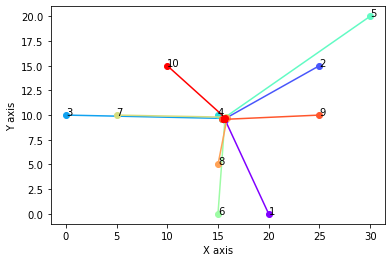

In [11]:
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

plt.xlabel("X axis")

plt.ylabel("Y axis")

In [12]:
print(A1)

[[0.16865422 0.13772628 0.07953094 0.13451571 0.02038331 0.11028342
  0.02470538 0.1628034  0.08993488 0.07146247]
 [0.04762994 0.13939113 0.08212419 0.10233945 0.00338287 0.11119758
  0.11020021 0.11107128 0.16991009 0.12275325]
 [0.0919399  0.11176576 0.17841094 0.01540195 0.17051771 0.17150771
  0.05380285 0.03297138 0.08066707 0.09301473]
 [0.13953047 0.10732834 0.24186083 0.02497096 0.05111336 0.03947338
  0.15981941 0.06198193 0.11410896 0.05981236]
 [0.04566382 0.03170513 0.18852989 0.03969289 0.05646805 0.10591586
  0.23582932 0.02789222 0.24069867 0.02760415]
 [0.21121588 0.10137295 0.21128112 0.13083285 0.15990854 0.00847663
  0.06117337 0.02599946 0.06405746 0.02568174]
 [0.07156484 0.09323343 0.01443694 0.15584678 0.12751851 0.05972818
  0.11776145 0.02114212 0.12962169 0.20914606]
 [0.08502069 0.1781206  0.03517463 0.19117568 0.07723762 0.04889069
  0.15653043 0.00536637 0.22123015 0.00125314]
 [0.11665892 0.04647104 0.12653415 0.16560215 0.04281287 0.09916236
  0.10189626

In [13]:
print(AF)

[[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976

In [14]:
print(len(PiA),np.array(PiA[len(PiA)-1]))

15 [[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564

In [15]:
def prod1_n(PiA):
    produit = np.identity(n)
    for i in PiA:
        produit = np.dot(produit,np.array(i))
    return produit

def prodn_1(PiA):
    produit = np.identity(n)
    for i in PiA:
        produit = np.dot(np.array(i),produit)
        #print(i,"\n \n matrice A \n \n",produit)
    return produit

def prod2n_1(PiA):
    produit = np.identity(n)
    for i in PiA[:10:-1]:
        produit = np.dot(produit,np.array(i))
    return produit



In [16]:
A1_n = prod1_n(PiA)
An_1 = prodn_1(PiA)

A2n_1 = prod2n_1(PiA)

In [17]:
print(A1_n)

[[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976

In [18]:
print(An_1)

[[0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288 0.06397549 0.12764188 0.08892161]
 [0.10458432 0.10739457 0.12649631 0.10044131 0.08335551 0.08200611
  0.11518288

In [19]:
print(a)

[[20.         25.          0.         15.         30.         15.
   5.         15.         25.         10.        ]
 [15.7296859  15.62113788 15.69643365 15.41380003 15.44303259 15.69071774
  15.76886336 15.89783896 15.43050219 15.70623063]
 [15.62995477 15.62982465 15.62973419 15.63001954 15.62969999 15.62955759
  15.62942781 15.62918075 15.62993813 15.62977155]
 [15.62973725 15.62973724 15.62973725 15.62973724 15.62973723 15.62973731
  15.62973729 15.62973731 15.62973725 15.62973723]
 [15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
  15.62973726 15.62973726 15.62973726 15.62973726]
 [15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
  15.62973726 15.62973726 15.62973726 15.62973726]
 [15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
  15.62973726 15.62973726 15.62973726 15.62973726]
 [15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
  15.62973726 15.62973726 15.62973726 15.62973726]
 [15.629

In [20]:
a1=[20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
b1=[ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

a2=[20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
b2=[ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

In [31]:
print(sum(a1)/n,sum(b1)/n)

16.0 9.5


In [21]:
Xpre = (a[0]*S).sum(axis=0)
Ypre = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k])

Prédiction de l'abscice final
 15.639824292595458

 Abscisse final de chaque agent :  
 [15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
 15.62973726 15.62973726 15.62973726 15.62973726]

Prédiction de l'ordonné final
 9.632561039623782

 Ordonné final de chaque agent :  
 [9.62935425 9.62935425 9.62935425 9.62935425 9.62935425 9.62935425
 9.62935425 9.62935425 9.62935425 9.62935425]




[15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
 15.62973726 15.62973726 15.62973726 15.62973726] [9.62935425 9.62935425 9.62935425 9.62935425 9.62935425 9.62935425
 9.62935425 9.62935425 9.62935425 9.62935425]


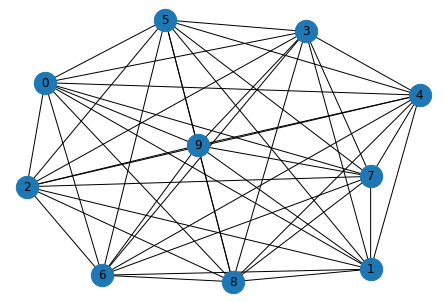

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


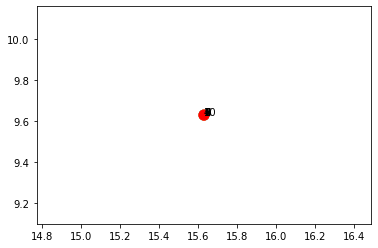

In [22]:

xf1,yf1 = mouvement(a1,b1,An_1)


#print(xf1.sum(axis=0)/n, yf1.sum(axis=0)/n)
print("\n")
print(xf1,yf1)

M = positionToAdjMatrix(xf1,yf1,r_det)
H = np.array(M).reshape(n,n)

show_graph_with_labels(np.array(M))
print(H)
    
plt.scatter(xf1[0:], yf1[0:], c=colors, s=100)

for i in range(1,n+1):
    plt.annotate(i, (xf1[i-1], yf1[i-1]))

In [23]:
print(a1)

[20.0, 25.0, 0.0, 15.0, 30.0, 15.0, 5.0, 15.0, 25.0, 10.0]


In [24]:
Xpre2 = (a[0]*An_1[0]).sum(axis=0)
Ypre2 = (b[0]*An_1[0]).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre2)
print("\n Abscisse final de chaque agent :  \n",a[k])
print("\nPrédiction de l'ordonné final\n",Ypre2)
print("\n Ordonné final de chaque agent :  \n",b[k])

Prédiction de l'abscice final
 15.629737258511108

 Abscisse final de chaque agent :  
 [15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
 15.62973726 15.62973726 15.62973726 15.62973726]

Prédiction de l'ordonné final
 9.629354254788765

 Ordonné final de chaque agent :  
 [9.62935425 9.62935425 9.62935425 9.62935425 9.62935425 9.62935425
 9.62935425 9.62935425 9.62935425 9.62935425]


In [25]:
xf,yf = mouvement(a2,b2,An_1)


print("\n")
print(xf,yf)



[15.62973726 15.62973726 15.62973726 15.62973726 15.62973726 15.62973726
 15.62973726 15.62973726 15.62973726 15.62973726] [9.62935425 9.62935425 9.62935425 9.62935425 9.62935425 9.62935425
 9.62935425 9.62935425 9.62935425 9.62935425]


In [26]:
print(sum(xf)/n)

15.62973725851111


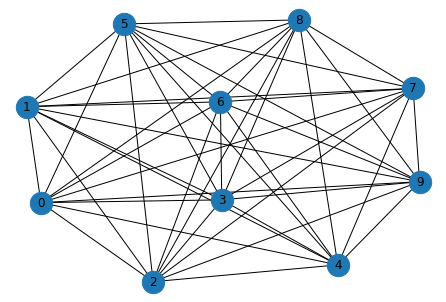

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


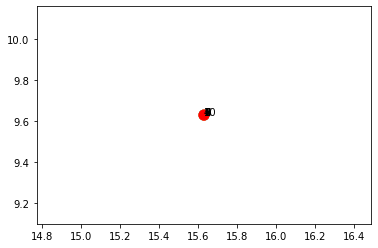

In [27]:
M = positionToAdjMatrix(xf,yf,r_det)
H = np.array(M).reshape(n,n)

show_graph_with_labels(np.array(M))
print(H)
    
plt.scatter(xf[0:], yf[0:], c=colors, s=100)

for i in range(1,n+1):
    plt.annotate(i, (xf[i-1], yf[i-1]))


In [28]:
print(A1_n[0])

[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
 0.11564976 0.06366334 0.12834991 0.08806393]
